In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class_name    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class_name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.class_name.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'class_name'],
      dtype='object')

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class_name      0
dtype: int64

In [9]:
df['class_name'] = df['class_name'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0, 1, 2])

In [10]:
df.class_name = df.class_name.astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   class_name    150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [12]:
df.class_name.unique()

[0, 1, 2]
Categories (3, int64): [0, 1, 2]

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X, y = df.iloc[:,0:4], df.iloc[:,4]

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

k = 5 #default
knn = KNeighborsClassifier(n_neighbors= k)
knn.fit(X_train, y_train)

y_pred = knn.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print('Roc_auc_score: ', roc_auc_score(y_test, knn.predict_proba(x_test), multi_class= 'ovr'))
print('Confusion matrix: ', confusion_matrix(y_test, y_pred))
print('Balanced accuracy: ', balanced_accuracy_score(y_test, y_pred))

Accuracy score: 1.0
Roc_auc_score:  1.0
Confusion matrix:  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Balanced accuracy:  1.0


In [21]:
df_2 = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
df_2

,Actual,Predict
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1


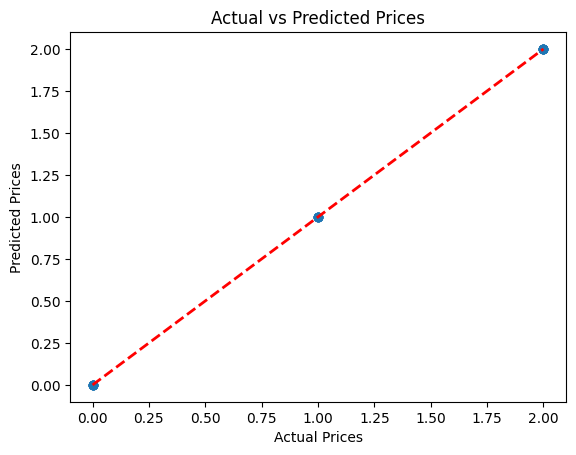

In [24]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()